<h1 style="font-family:Corbel Light; color:#e54b87">Projet 3: Concevez une application au service de la santé publique </h1>

<h2 style="font-family:Corbel Light; color:#737373">Contexte</h2>

L’agence Santé Publique France a lancé un appel à projet autour des problématiques alimentaires. Elle souhaite trouver des idées innovantes d’applications pour améliorer l’alimentation de la population française. 

<h2 style="font-family:Corbel Light; color:#737373">Mission</h2>

Proposer une idée d’application et mener une analyse exploratoire pour vérifier que notre idée est réalisable à partir du jeu de données nutritionnelles mis à notre disposition.

Idée d'application étudiée : permettre à l’utilisateur de scanner le code barre d’un produit pour se voir proposer des produits de la même famille d’aliments, mais avec la meilleure valeur nutritionnelle possible et le plus faible degré de transformation possible. 

<h2 style="font-family:Corbel Light; color:#737373">Data Source</h2>

Jeu de données issu de la base Open Food Facts : https://world.openfoodfacts.org/

<h2 style="font-family:Corbel Light; color:#737373">Requirements</h2>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import toolbox

%matplotlib inline
pd.options.display.float_format = '{:_.2f}'.format

In [2]:
python_version = !python -V
print('python version :', python_version,'\n')

print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('seaborn version : ', sns.__version__, '\n')
print('scikit-learn version : ', sklearn.__version__, '\n')

python version : ['Python 3.9.12'] 

pandas version :  1.4.2 

numpy version :  1.21.5 

matplotlib version :  3.5.1 

seaborn version :  0.12.1 

scikit-learn version :  1.1.3 



**Versions utilisées :**

- python : Python 3.9.12
- scikit-learn  :  1.1.3  
- seaborn    :  0.12.1
- matplotlib :  3.5.1 
- numpy  :  1.21.5 
- pandas :  1.4.2

<h2 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Étape 1</span> : Nettoyage  du jeu de données</h2>

<h3 style="font-family:Corbel Light; color:#737373">Inspection des données</h3>

In [ ]:
food_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

On affiche les 5 premières lignes du dataframe 

In [4]:
food_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.00,14.00,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,12.00,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On regarde la taille du dataframe

In [5]:
food_data.shape

(320772, 162)

On regarde les statistiques élémentaires (min, max, moyenne, écart type, etc) pour toutes les variables quantitatives

In [6]:
food_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.00,248_939.00,248_939.00,0.00,248_939.00,0.00,0.00,261_113.00,857.00,243_891.00,...,49.00,3_036.00,165.00,948.00,0.00,268.00,221_210.00,221_210.00,0.00,0.00
mean,NaN,1.94,0.02,NaN,0.06,NaN,NaN,1_141.91,585.50,12.73,...,6.43,31.46,15.41,49.55,NaN,341.70,9.17,9.06,NaN,NaN
std,NaN,2.50,0.14,NaN,0.27,NaN,NaN,6_447.15,712.81,17.58,...,2.05,31.97,3.75,18.76,NaN,425.21,9.06,9.18,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,...,0.00,0.00,8.00,6.00,NaN,0.00,-15.00,-15.00,NaN,NaN
25%,NaN,0.00,0.00,NaN,0.00,NaN,NaN,377.00,49.40,0.00,...,6.30,0.00,12.00,32.00,NaN,98.75,1.00,1.00,NaN,NaN
50%,NaN,1.00,0.00,NaN,0.00,NaN,NaN,1_100.00,300.00,5.00,...,7.20,23.00,15.00,50.00,NaN,195.75,10.00,9.00,NaN,NaN
75%,NaN,3.00,0.00,NaN,0.00,NaN,NaN,1_674.00,898.00,20.00,...,7.40,51.00,15.00,64.25,NaN,383.20,16.00,16.00,NaN,NaN
max,NaN,31.00,2.00,NaN,6.00,NaN,NaN,3_251_373.00,3_830.00,714.29,...,8.40,100.00,25.00,100.00,NaN,2_842.00,40.00,40.00,NaN,NaN


<h3 style="font-family:Corbel Light; color:#737373">Sélection des variables</h3>

On supprime les colonnes avec plus de 80% de valeurs manquantes

Remarque : une des composantes du nutriscore ne contient pas suffisamment de données pour être conservée

In [7]:
missing_values_df = toolbox.missing_values_by_column(food_data)
missing_values_df.loc[missing_values_df['VARIABLES'] == 'fruits-vegetables-nuts_100g']

,VARIABLES,Number of Missing Values,Missing Values (%)
153,fruits-vegetables-nuts_100g,317736,99.05


In [8]:
food_subset = food_data.dropna(axis=1, thresh=0.2 * food_data.shape[0])
food_subset.shape

(320772, 54)

On va sélectionner des variables parmi les 54 colonnes restantes. On garde en priorité :
- le Nutri-Score (lettre et score) ainsi que ses composantes 
- le code barre (clé d'unicité) et le nom du produit
- les catégories du programme national de nutrition et santé (pour imputer les valeurs manquantes ou aberrantes)
- les dates de créations et de modifications (pour sélectionner les produits à garder parmis les doublons)

En bonus, on sélectionne des colonnes qui peuvent être utiles pour l'application (image, additifs, pays de vente)

*Composantes nutri-score:*

Composantes négatives
- saturated-fat_100g
- sugars_100g
- energy_100g
- sodium_100g
- salt_100g

Composantes positives
- fiber_100g
- proteins_100g

In [9]:
missing_values_df = toolbox.missing_values_by_column(food_subset)
missing_values_df.head(60)

,VARIABLES,Number of Missing Values,Missing Values (%)
5,last_modified_t,0,0.00
6,last_modified_datetime,0,0.00
2,creator,2,0.00
3,created_t,3,0.00
4,created_datetime,9,0.00
0,code,23,0.01
1,url,23,0.01
32,states_fr,46,0.01
31,states_tags,46,0.01
30,states,46,0.01


In [10]:
columns_to_keep = ['code', 'product_name', 
                   'last_modified_datetime','created_datetime',
                   'nutrition-score-fr_100g', 'nutrition_grade_fr', 
                   'saturated-fat_100g', 'sugars_100g', 'energy_100g', 'sodium_100g', 'salt_100g',
                   'proteins_100g', 'fiber_100g', 
                   'pnns_groups_1', 'pnns_groups_2', 
                   'image_small_url', 'countries_tags', 'creator', 'additives_n', 'additives']

print('On garde', len(columns_to_keep), 'colonnes')

On garde 20 colonnes


In [11]:
food_subset = food_subset[columns_to_keep]
food_subset.shape

(320772, 20)

On change le type des variables 'last_modified_datetime' et 'created_datetime' en datetime et de la variable 'code' en float

In [12]:
food_subset.dtypes

code                        object
product_name                object
last_modified_datetime      object
created_datetime            object
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
saturated-fat_100g         float64
sugars_100g                float64
energy_100g                float64
sodium_100g                float64
salt_100g                  float64
proteins_100g              float64
fiber_100g                 float64
pnns_groups_1               object
pnns_groups_2               object
image_small_url             object
countries_tags              object
creator                     object
additives_n                float64
additives                   object
dtype: object

In [13]:
food_subset['last_modified_datetime'] = pd.to_datetime(food_subset['last_modified_datetime'],
                                                       format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
food_subset['created_datetime'] = pd.to_datetime(food_subset['created_datetime'],
                                                 format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
food_subset['code'] = pd.to_numeric(food_subset['code'], errors='coerce')

food_subset.dtypes[['last_modified_datetime', 'created_datetime', 'code']]

last_modified_datetime    datetime64[ns]
created_datetime          datetime64[ns]
code                             float64
dtype: object

On supprime les lignes où les variables indispensables ne sont pas remplies : 'code', 'product_name'

In [14]:
food_subset = food_subset.dropna(subset=['code', 'product_name'])
food_subset.shape

(302987, 20)

<h3 style="font-family:Corbel Light; color:#737373">Traitement des doublons</h3>

Si deux produits ont le même code barre alors on garde :
- celui avec le moins de valeurs manquantes
- le plus récemment modifié

In [15]:
food_subset = toolbox.clean_duplicates(food_subset, 'code', 'last_modified_datetime')

Il y a 158 doublon(s)
158 ligne(s) supprimée(s)
Il reste 0 doublon(s)


<h3 style="font-family:Corbel Light; color:#737373">Traitement des valeurs aberrantes</h3>

Pour les composantes du nutriscore (calculées par 100g de produit): 
- sucre, sel, sodium, acides gras saturés, protéines, fibres
    - si valeur négative ou supérieure à 100g alors est elle considérée comme aberrante
    - impute avec la **moyenne de la famille d'aliments** à laquelle appartient le produit
- énergie :
    - si valeur négative ou supérieure à 3 765Kj alors est elle considérée comme aberrante
    - impute avec la **moyenne de la famille d'aliments** à laquelle appartient le produit
    
*rmq : on fixe un max à 3 765Kj car les aliments les plus caloriques (huile d'avocat, huile de noisette ...) contiennent 900kcal/100g (1kcal ~ 4,2Kj)*

**Choix des familles d'aliments utilisées** : pnns_groups_1 ou pnns_groups_2 ?

On commence par nettoyer ces deux variables (parfois le même nom est en minuscule/majuscule avec/sans tiret)

In [16]:
food_subset['pnns_groups_1'] = food_subset['pnns_groups_1'].replace('unknown', np.nan)
food_subset['pnns_groups_2'] = food_subset['pnns_groups_2'].replace('unknown', np.nan)

mask_gp_1 = (food_subset['pnns_groups_1'].isnull())
mask_gp_2 = (food_subset['pnns_groups_2'].isnull())

food_subset.loc[~mask_gp_1, 'pnns_groups_1'] = food_subset.loc[~mask_gp_1].apply(
    lambda row: toolbox.normalize_string(row['pnns_groups_1'], True), axis=1)
food_subset.loc[~mask_gp_2, 'pnns_groups_2'] = food_subset.loc[~mask_gp_2].apply(
    lambda row: toolbox.normalize_string(row['pnns_groups_2'], True), axis=1)

print(food_subset.loc[(~mask_gp_1) & (mask_gp_2)].shape[0],
      'valeurs avec pnns groupe 1 et pas de pnns groupe 2')
print(food_subset.loc[(mask_gp_1) & (~mask_gp_2)].shape[0],
      'valeurs avec pnns groupe 2 et pas de pnns groupe 1')

0 valeurs avec pnns groupe 1 et pas de pnns groupe 2
2825 valeurs avec pnns groupe 2 et pas de pnns groupe 1


On regarde la distribution de la variable 'pnns_groups_2' pour vérifier qu'il y a bien suffisamment de valeurs dans chacun des groupes pour calculer une moyenne.

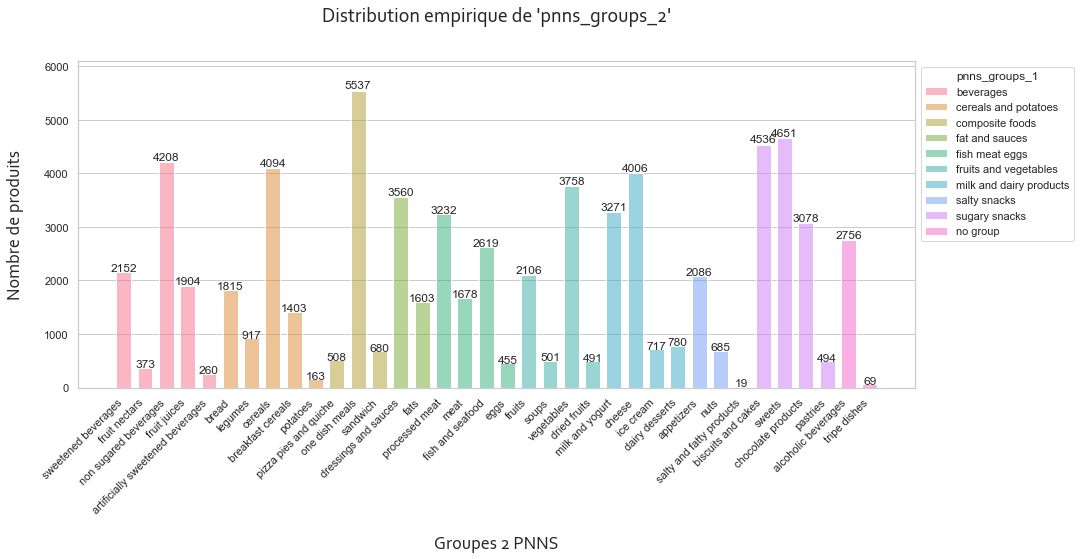

In [17]:
food_subset_pnns2 = food_subset.loc[(~mask_gp_2)].sort_values('pnns_groups_1')
food_subset_pnns2['pnns_groups_1'].replace(np.nan, 'no group', inplace=True)

titles = {'chart_title': 'Distribution empirique de \'pnns_groups_2\'',
          'y_title': 'Nombre de produits',
          'x_title': 'Groupes 2 PNNS'}

toolbox.plot_distribution_with_hue(food_subset_pnns2, 
                                   'pnns_groups_2', 
                                   'pnns_groups_1', 
                                   (15, 6), titles, 'husl')

L'effectif le plus faible est 19 pour la modalité "salty and fatty products" (qui contient surtout du popcorn) appartenant au pnns_groups_1 salty snacks

On peut donc utiliser la variable 'pnns_groups_2' pour imputer nos valeurs

In [18]:
food_subset_before_imputation = food_subset.copy()

In [19]:
limits_nutrients = {'energy_100g': {'min': 0.0, 'max': 3_765},
                    'saturated-fat_100g': {'min': 0.0, 'max': 100.0},
                    'sugars_100g': {'min': 0.0, 'max': 100.0},
                    'sodium_100g': {'min': 0.0, 'max': 100.0},
                    'salt_100g': {'min': 0.0, 'max': 100.0},
                    'proteins_100g': {'min': 0.0, 'max': 100.0},
                    'fiber_100g': {'min': 0.0, 'max': 100.0}}

food_subset = toolbox.replace_outliers_by_mean(
    food_subset, limits_nutrients, 'pnns_groups_2')

723 valeur(s) aberrante(s)
618 ligne(s) supprimée(s)


Pour note du nutri-score : 
- si valeur inférieure à -15 ou supérieure à 40 alors elle est considérée comme aberrante
- impute avec la limite la plus proche (ex: -45 remplacé par -15)

In [20]:
food_subset = toolbox.replace_outliers_by_limits(food_subset,
                                                 {'nutrition-score-fr_100g': {'min': -15.0, 'max': 40.0}})

0 valeur(s) aberrante(s)


On voit qu'il ne reste plus d'outliers numériques:

In [21]:
food_subset.describe().loc[['min', 'max']].drop(columns=['code'])

,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,energy_100g,sodium_100g,salt_100g,proteins_100g,fiber_100g,additives_n
min,-15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,40.00,100.00,100.00,3_764.00,83.00,100.00,100.00,100.00,31.00


On vérifie qu'il n'y a pas d'autres lettres que " a, b, c, d, e " dans la variable 'nutrition_grade_fr'

In [22]:
food_subset['nutrition_grade_fr'].unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

On supprime les lignes dans lesquelles le nutri-score et le nutri-grade ne correspondent pas (car impossible de savoir lequel des 2 est le bon)

In [23]:
limits_grade = {'a': {'min': -15, 'max': -1},
                'b': {'min': 0, 'max': 2},
                'c': {'min': 3, 'max': 10},
                'd': {'min': 11, 'max': 18},
                'e': {'min': 19, 'max': 40}}

food_subset = toolbox.drop_uncorrect_nutriscore(
    food_subset, limits_grade, 'nutrition_grade_fr', 'nutrition-score-fr_100g')

d : 856 valeur(s) aberrante(s)
b : 142 valeur(s) aberrante(s)
c : 465 valeur(s) aberrante(s)
a : 70 valeur(s) aberrante(s)
e : 1727 valeur(s) aberrante(s)
3260 valeur(s) supprimée(s)


<h3 style="font-family:Corbel Light; color:#737373">Traitement des valeurs manquantes numériques</h3>

On va chercher à imputer les valeurs manquantes des variables utilisées pour le calcul du nutri-score.

Si il manque des valeurs alors :
- remplace par la **moyenne** de la sous-catégore définie par le Programme National de Nutrition et Santé (pnns_group_2)

In [24]:
nutrients = toolbox.get_columns_contains(food_subset, '_100g', 'nutrition-score-fr_100g')

missing_values_df = toolbox.missing_values_by_column(food_subset)
missing_values_df.loc[missing_values_df['VARIABLES'].isin(nutrients)].sort_values('Missing Values (%)')

,VARIABLES,Number of Missing Values,Missing Values (%)
8,energy_100g,45160,15.11
11,proteins_100g,46311,15.49
10,salt_100g,50401,16.86
9,sodium_100g,50440,16.87
7,sugars_100g,60780,20.33
6,saturated-fat_100g,76152,25.47
12,fiber_100g,102796,34.39


In [25]:
columns_to_fill_with_mean = toolbox.get_columns_contains(food_subset, '_100g', ['nutrition-score-fr_100g', 'fiber_100g'])
food_subset = toolbox.fill_missing_values_with_mean_by_(food_subset, columns_to_fill_with_mean, 'pnns_groups_2')

83_956 valeur(s) manquante(s)
63_389 lignes(s) supprimée(s)
Il reste 0 valeur(s) manquante(s)


Les valeurs manquantes de la variable 'fiber_100g' sont peut-être des valeurs nulles non des oublis (la quantité en fibres dans les aliments est souvent faible) 

On impute donc avec 0.0

In [26]:
print('fiber_100g :', food_subset.loc[food_subset['fiber_100g'].isnull()].shape[0], 'valeur(s) manquante(s)')
food_subset['fiber_100g'].replace(np.nan, 0.0, inplace=True)

fiber_100g : 45080 valeur(s) manquante(s)


In [27]:
food_subset.shape

(235562, 20)

On compare la distribution de chaque variable modifiée avant/après imputation pour voir si leur forme a beaucoup changé. 

*Remarque : On affiche pas les oultliers (calculés avec la méthode des boxplots) pour que les graphiques soients plus lisibles*

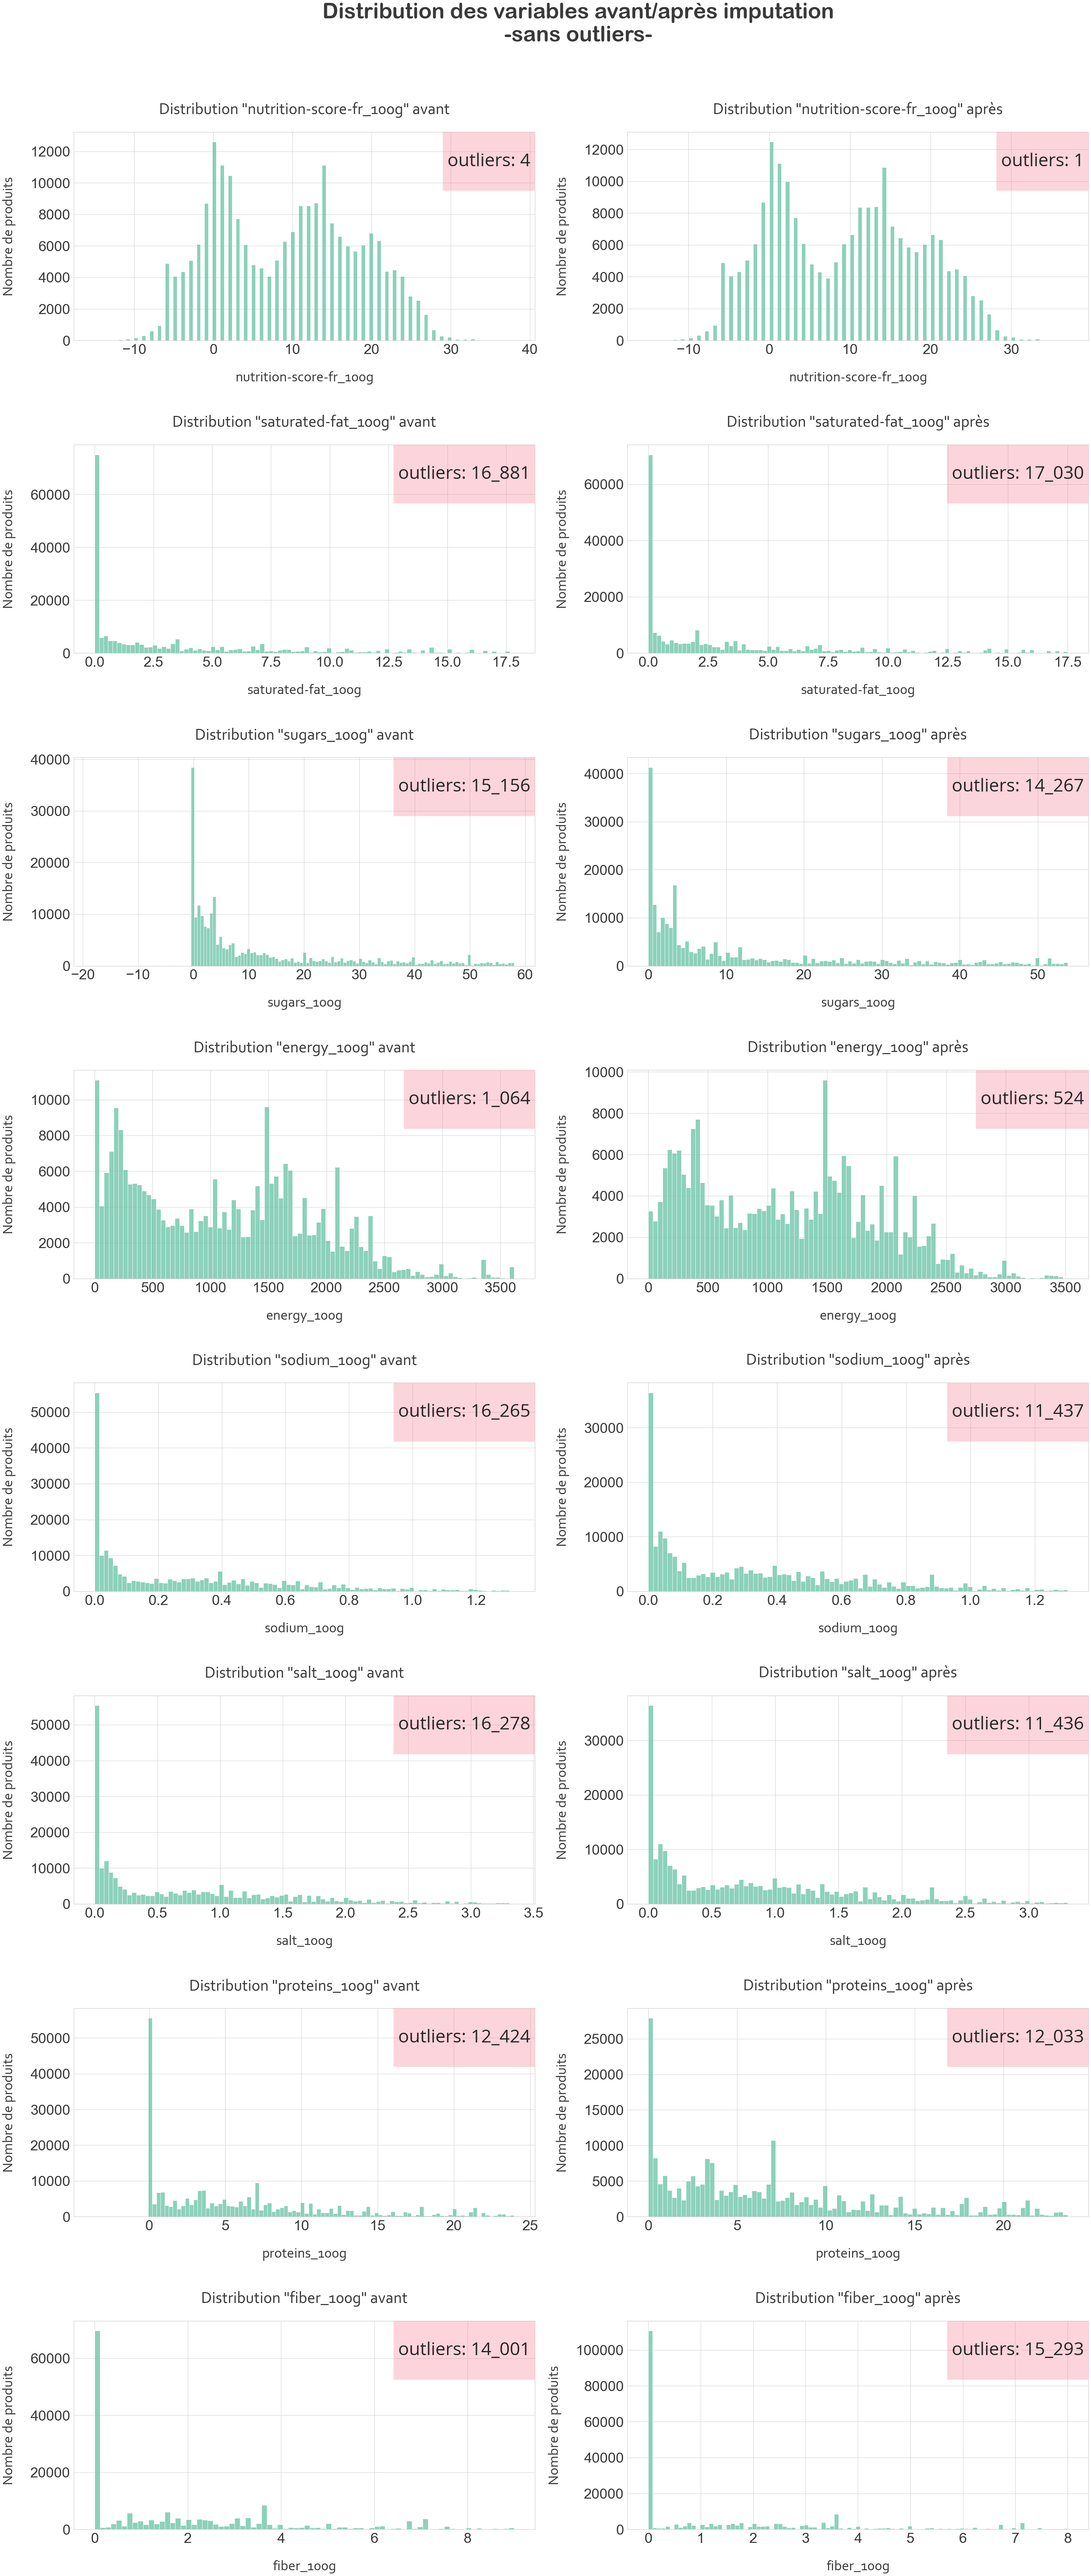

In [28]:
columns_100g = toolbox.get_columns_contains(food_subset, '_100g')

toolbox.plot_dist_comparison(food_subset_before_imputation,
                             food_subset, columns_100g,
                             'des variables avant/après imputation\n-sans outliers-',
                             (40, 100), True)

<h3 style="font-family:Corbel Light; color:#737373">Estimation des nutri-grades manquants</h3>

On cherche à estimer les nutri-grades manquants avec un classifieur k-NN

In [29]:
missing_values_df.loc[missing_values_df['VARIABLES'].isin(['nutrition_grade_fr', 'nutrition-score-fr_100g'])]

,VARIABLES,Number of Missing Values,Missing Values (%)
5,nutrition_grade_fr,84201,28.17
4,nutrition-score-fr_100g,84201,28.17


In [30]:
mask_missing_nutrigrade = food_subset['nutrition_grade_fr'].isnull()
food_subset_no_missing_nutrigrade = food_subset.loc[(~mask_missing_nutrigrade)]
food_subset_no_missing_nutrigrade.shape

(214678, 20)

In [31]:
food_subset_sampled = resample(food_subset_no_missing_nutrigrade, random_state=0, n_samples=214_678)

X_sampled = food_subset_sampled[nutrients]
Y_sampled = food_subset_sampled[['nutrition_grade_fr', 'nutrition-score-fr_100g']]
X_train, X_test, Y_train, Y_test = train_test_split(X_sampled, Y_sampled, train_size=0.8)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

On cherche le KNN qui minimise l'erreur de prédiction. On va tester le modèle pour :
- nombre de voisins :  3, 5, 7, 9, 11, 13, 15
- poids attribué à chaque voisin : 'uniform' ou 'distance'
- méthode pour calculer la distance par rapport aux voisins : 'euclidean' ou 'manhattan'

Soit 7 * 2 * 2 * 3 (cross validations) = 84 modèles possibles (celà prend 5 min, d'où le fait de ne pas tester tous les modèles entre 2 et 15)

In [33]:
grid_params = {'n_neighbors': np.arange(3, 16, 2),
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}

Prédiction du nutrigrade avec un classifier

In [44]:
gs_class = GridSearchCV(neighbors.KNeighborsClassifier(),
                        grid_params,
                        verbose=1,
                        cv=3,
                        n_jobs=-1)

gs_results_class = gs_class.fit(X_train, Y_train['nutrition_grade_fr'])

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [45]:
print('Meilleur modèle nutrigrade:', gs_results_class.best_params_)
print('Pourcentage de prédictions véridiques : {} %'.format(round(gs_results_class.best_score_ * 100, 2)))

Meilleur modèle nutrigrade: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Pourcentage de prédictions véridiques : 94.75 %


***

***

Bonus : Prédiction du nutriscore avec un regressor

In [36]:
gs_score = GridSearchCV(neighbors.KNeighborsRegressor(),
                        grid_params,
                        verbose=1,
                        cv=3,
                        n_jobs=-1)

gs_results_score = gs_score.fit(X_train, Y_train['nutrition-score-fr_100g'])

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [37]:
print('Meilleur modèle nutriscore:', gs_results_score.best_params_)
print('Coefficient de détermination : {}'.format(round(gs_results_score.best_score_, 3)))

Meilleur modèle nutriscore: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Coefficient de détermination : 0.987


Si on estime le nutriscore avec les paramètres du meilleur regressor sur les données test :

In [38]:
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=gs_results_score.best_params_['n_neighbors'],
                                        metric=gs_results_score.best_params_['metric'],
                                        weights=gs_results_score.best_params_['weights'])
knn_reg.fit(X_train, Y_train['nutrition-score-fr_100g'])

print('Coefficient de détermination: ',
      round(knn_reg.score(X_test, Y_test['nutrition-score-fr_100g']), 3))

Coefficient de détermination:  0.991


***

***

On va estimer le nutrigrade avec les paramètres du meilleur classifier :

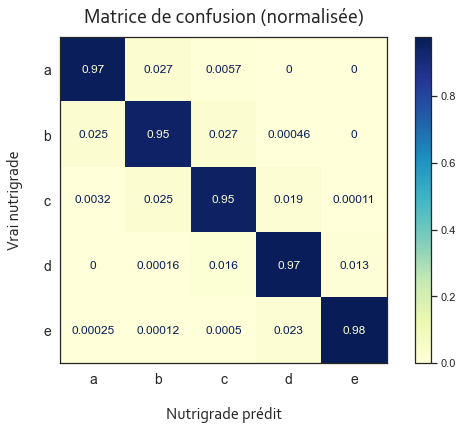

Pourcentage total de prédictions véridiques:  96.37 %


In [39]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors=gs_results_class.best_params_['n_neighbors'],
                                           metric=gs_results_class.best_params_['metric'],
                                           weights=gs_results_class.best_params_['weights'])
knn_class.fit(X_train, Y_train['nutrition_grade_fr'])

nutrigrades = food_subset_sampled['nutrition_grade_fr'].unique().sort()

toolbox.display_confusion_matrix(knn_class,
                                 X_test,
                                 Y_test['nutrition_grade_fr'],
                                 nutrigrades,
                                 'Nutrigrade prédit',
                                 'Vrai nutrigrade')

print('Pourcentage total de prédictions véridiques: ',
      round(knn_class.score(X_test, Y_test['nutrition_grade_fr']) * 100, 2), '%')

In [40]:
food_subset.loc[mask_missing_nutrigrade, 'nutrition_grade_fr'] = knn_class.predict(
    scaler.transform(food_subset.loc[mask_missing_nutrigrade][nutrients]))

On compare la répartition des nutrigrades avant et après imputation pour vérifier qu'elle n'a pas trop changé

In [41]:
nutrigrades_before = food_subset_no_missing_nutrigrade['nutrition_grade_fr'].value_counts(normalize=True)
nutrigrades_after = food_subset['nutrition_grade_fr'].value_counts(normalize=True)

nutrigrades_df = pd.DataFrame(nutrigrades_before).merge(pd.DataFrame(nutrigrades_after),
                                                        right_index=True,
                                                        left_index=True)

nutrigrades_df = nutrigrades_df.sort_index().reset_index()
nutrigrades_df.rename(columns={'nutrition_grade_fr_x': 'before',
                               'nutrition_grade_fr_y': 'after',
                               'index': 'nutrigrade'}, inplace=True)

nutrigrades_df = pd.melt(nutrigrades_df, id_vars="nutrigrade", var_name="when", value_name="fréquence")

nutrigrades_df['fréquence'] = nutrigrades_df['fréquence'] * 100

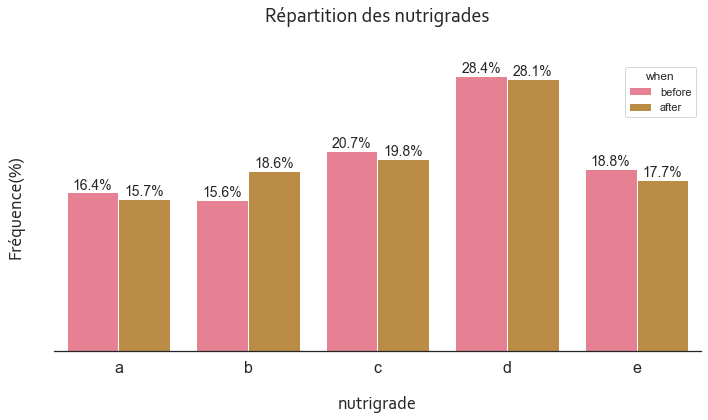

In [42]:
toolbox.plot_bar_to_compare_frequency(nutrigrades_df, "Répartition des nutrigrades", 'nutrigrade', 'when')

<h3 style="font-family:Corbel Light; color:#737373">Enregistrement des données propres</h3>

In [43]:
food_subset.to_csv('food_subset_clean.csv', index=False, date_format='%Y-%m-%d')